### Laboratorio 7 
Stefano Aragoni 
Carol Arevalo 

0. Importar librerias correspondientes

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor


ModuleNotFoundError: No module named 'autogluon'

1. Carga del Conjunto de Datos:


In [ ]:
# Crear un DataFrame con el contenido
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Análisis Exploratorio de Datos (EDA):

In [ ]:
# Estadísticas descriptivas básicas
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

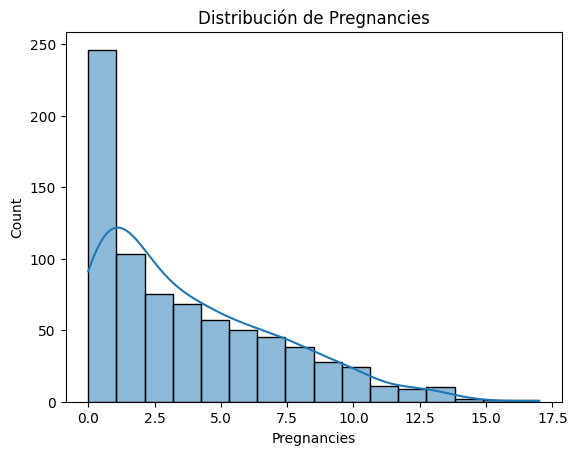

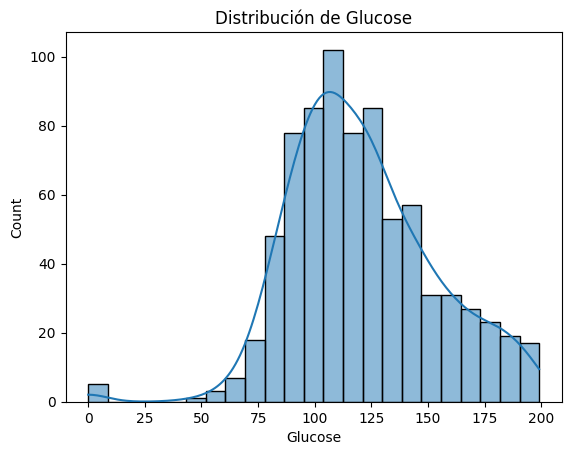

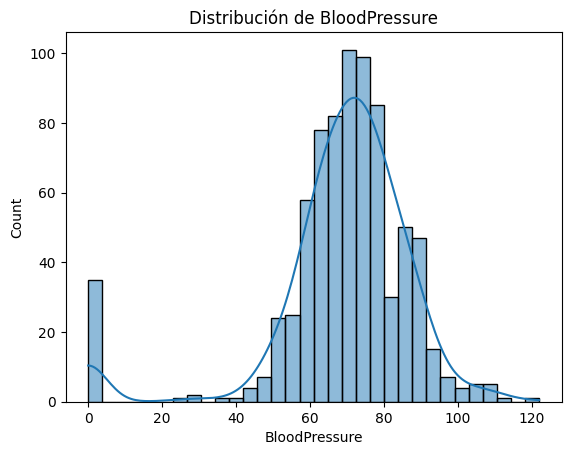

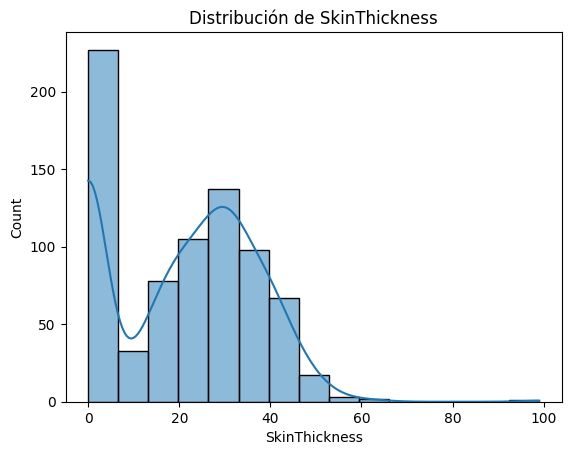

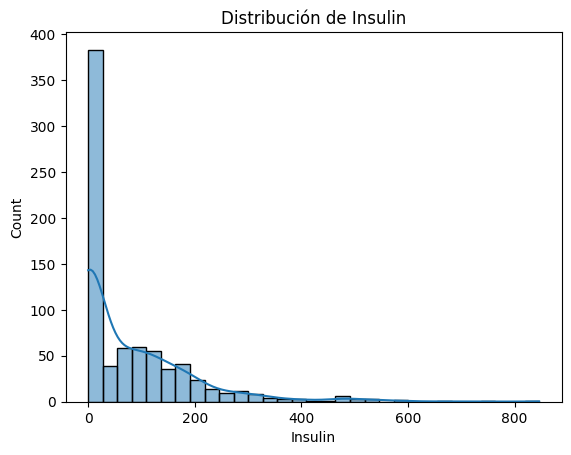

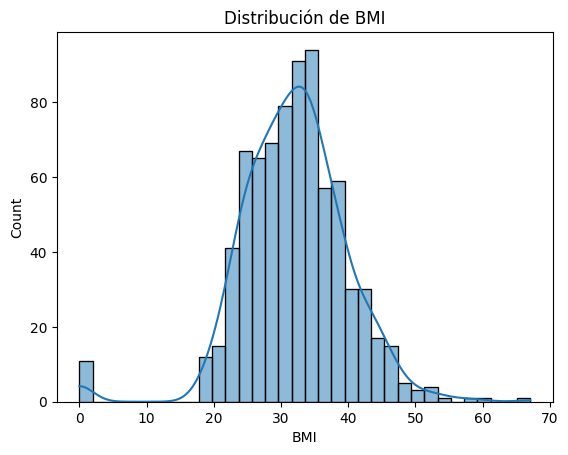

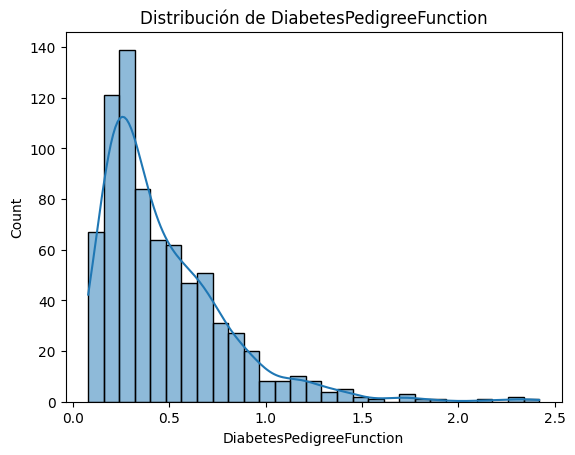

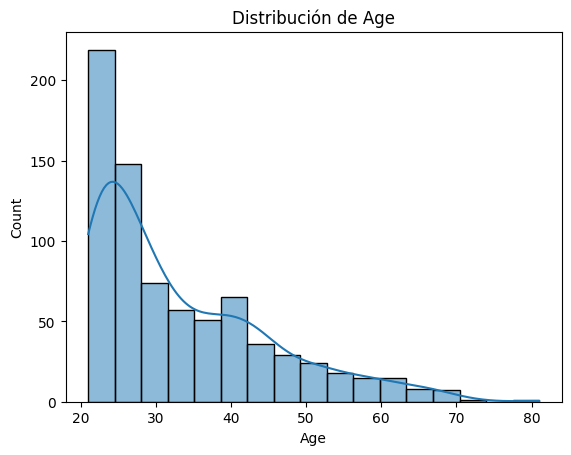

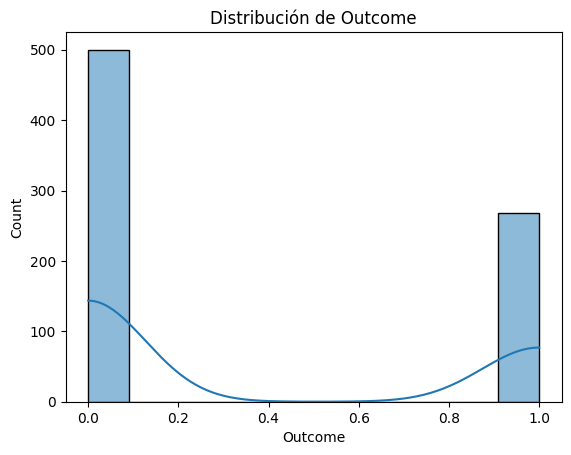

In [ ]:
# Visualización de la distribución de las variables
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()


In [ ]:
# Verificación de valores nulos
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

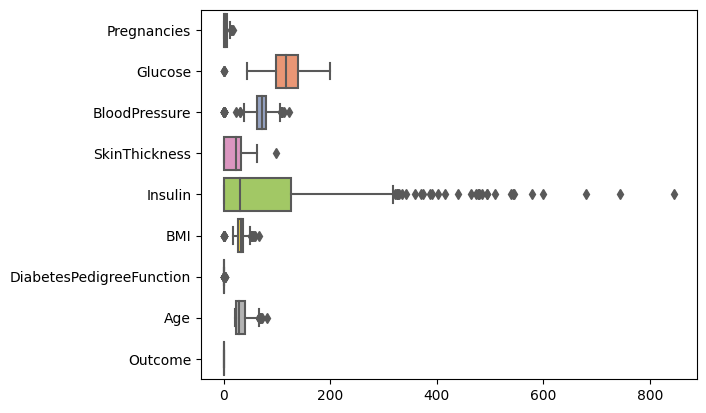

In [ ]:
# Ver datos atipicos
sns.boxplot(data=df, orient='h', palette='Set2')

3. Entrenamiento con AutoGluo

In [ ]:

label = 'Outcome'
save_path = 'ag_models/'
predictor = TabularPredictor(label=label, path=save_path).fit(df, presets='best_quality', eval_metric='accuracy')


4. Evaluación del Modelo:


In [ ]:
# Desplegar una tabla de los mejores modelos (leaderboard)
leaderboard = predictor.leaderboard(df)
print(leaderboard)

# Visualizar la matriz de confusión del mejor modelo
y_pred = predictor.predict(df)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df[label], y_pred))

sns.heatmap(confusion_matrix(df[label], y_pred), annot=True, cmap="YlGnBu")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()


5. Reflexión:
